<a href="https://colab.research.google.com/github/Soumiyads2004/BANK_CHURN/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the path to your CSV is correct
df = pd.read_csv("/content/bank_Churn.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [36]:
# Import LabelEncoder (although not used in the provided code snippet, it was in the original)
from sklearn.preprocessing import LabelEncoder

# Encode the target
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Encode categorical variables
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Drop irrelevant features
df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1, inplace=True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Drop the target column from features
X = df.drop('Churn', axis=1)
y = df['Churn']

# ✅ Step 1: Convert non-numeric columns to numeric (if any)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# Ensure target is integer type
y = y.astype('int')

# ✅ Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 3: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Step 4: Predict and Evaluate
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1699    0]
 [   0  327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Step 1: Encode ALL object columns to category codes
X = df.drop('Churn', axis=1)
y = df['Churn']

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].fillna('Unknown')  # Handle missing values
        X[col] = X[col].astype('category').cat.codes  # Encode to numbers

# Also ensure y is numeric
y = y.fillna(0)
y = y.astype('int')

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1699    0]
 [   0  327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



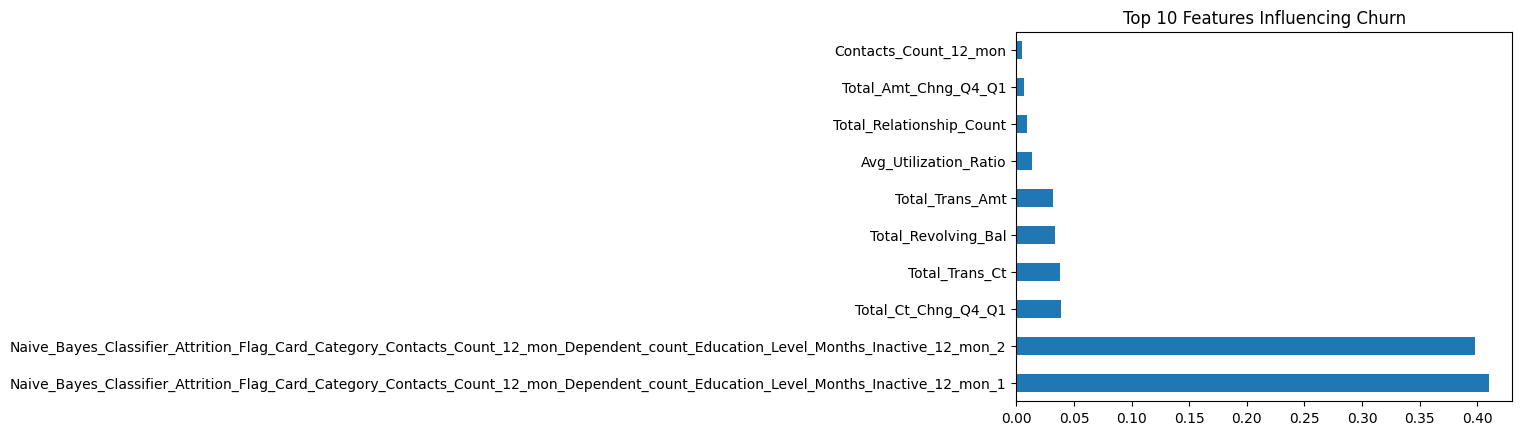

In [41]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Churn")
plt.show()
